In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import pandas as pd
import string
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import nltk
import subprocess
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

# SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

# plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# metric (AUC, ROC, sensitivity & specificity)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from torch.utils.data import DataLoader, TensorDataset
!pip install snntorch
import snntorch as snn
from snntorch import surrogate
from snntorch import utils
import snntorch.functional as SF
import math
# !pip install ncps

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')
torch.manual_seed(42)
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')
# nltk.download("punkt")

# try:
#     nltk.data.find('wordnet.zip')
# except:
#     nltk.download('wordnet', download_dir='/kaggle/working/')
#     command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
#     subprocess.run(command.split())
#     nltk.data.path.append('/kaggle/working/')

from nltk.corpus import wordnet as wn



2024-04-13 13:25:30.289535: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 13:25:30.289644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 13:25:30.408440: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 4.8 MB/s eta 0:00:00
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib

In [2]:
def create_embedding_matrix(word_index, embedding_dict=None, d_model=100):
    """
     this function create the embedding matrix save in numpy array
    :param word_index: a dictionary with word: index_value
    :param embedding_dict: a dict with word embedding
    :d_model: the dimension of word pretrained embedding, here I just set to 100, we will define again
    :return a numpy array with embedding vectors for all known words
    """
    embedding_matrix = np.zeros((len(word_index) + 1, d_model))
    ## loop over all the words
    for word, index in word_index.items():
        if word in embedding_dict:
            embedding_matrix[index] = embedding_dict[word]
    return embedding_matrix

In [3]:
def plot_metrics(df_metrics):
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # Creating a grid of subplots
    fig.suptitle('Training and Testing Metrics Over Epochs')

    # Plotting Train and Test Loss
    axs[0, 0].plot(df_metrics['Epoch'], df_metrics['Train Loss'], label='Train Loss')
    axs[0, 0].plot(df_metrics['Epoch'], df_metrics['Test Loss'], label='Test Loss', linestyle='--')
    axs[0, 0].set_title('Loss')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Loss')
    axs[0, 0].legend()

    # Plotting Train and Test Accuracy
    axs[0, 1].plot(df_metrics['Epoch'], df_metrics['Train Accuracy'], label='Train Accuracy')
    axs[0, 1].plot(df_metrics['Epoch'], df_metrics['Test Accuracy'], label='Test Accuracy', linestyle='--')
    axs[0, 1].set_title('Accuracy')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Accuracy')
    axs[0, 1].legend()

    # Plotting Train and Test Precision
    axs[1, 0].plot(df_metrics['Epoch'], df_metrics['Train Precision'], label='Train Precision')
    axs[1, 0].plot(df_metrics['Epoch'], df_metrics['Test Precision'], label='Test Precision', linestyle='--')
    axs[1, 0].set_title('Precision')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Precision')
    axs[1, 0].legend()

    # Plotting Train and Test Recall
    axs[1, 1].plot(df_metrics['Epoch'], df_metrics['Train Recall'], label='Train Recall')
    axs[1, 1].plot(df_metrics['Epoch'], df_metrics['Test Recall'], label='Test Recall', linestyle='--')
    axs[1, 1].set_title('Recall')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Recall')
    axs[1, 1].legend()

    # Plotting Train and Test F1 Score
    axs[2, 0].plot(df_metrics['Epoch'], df_metrics['Train F1 Score'], label='Train F1 Score')
    axs[2, 0].plot(df_metrics['Epoch'], df_metrics['Test F1 Score'], label='Test F1 Score', linestyle='--')
    axs[2, 0].set_title('F1 Score')
    axs[2, 0].set_xlabel('Epoch')
    axs[2, 0].set_ylabel('F1 Score')
    axs[2, 0].legend()

    # Plotting Epoch Time
    axs[2, 1].plot(df_metrics['Epoch'], df_metrics['Epoch Time'], label='Epoch Time')
    axs[2, 1].set_title('Time per Epoch')
    axs[2, 1].set_xlabel('Epoch')
    axs[2, 1].set_ylabel('Time (sec)')
    axs[2, 1].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout
    plt.show()

In [4]:
def preprocess_text(text):
    # Initial preprocessing to remove special characters and tokenize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if re.match(r'\b\w+\b', token) and token.lower() not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

def tokenize_data(train_texts, test_texts, max_len=25):
    # Preprocess texts
    processed_train_texts = [preprocess_text(text) for text in train_texts]
    processed_test_texts = [preprocess_text(text) for text in test_texts]

    # Create and fit tokenizer on the training texts
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(processed_train_texts)
    
    # Convert texts to sequences and pad them
    train_sequences = tokenizer.texts_to_sequences(processed_train_texts)
    test_sequences = tokenizer.texts_to_sequences(processed_test_texts)
    padded_train_sequences = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_len)
    padded_test_sequences = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_len)
    
    return padded_train_sequences, padded_test_sequences, tokenizer

dfTest = pd.read_csv("/kaggle/input/info-retreval/test_pos_neg.csv", encoding = 'ISO-8859-1').rename(columns={"Sentiment":"Label"})
dfTrain = pd.read_csv("/kaggle/input/info-retreval/train_pos_neg.csv", encoding = 'ISO-8859-1').rename(columns={"Sentiment":"Label"})
dfTrain["Label"]=dfTrain["Label"].map({"POSITIVE":1, "NEGATIVE":0}).sample(frac=1).reset_index(drop=True)
dfTest["Label"]=dfTest["Label"].map({"POSITIVE":1, "NEGATIVE":0}).sample(frac=1).reset_index(drop=True)


glove = pd.read_csv('../input/glove-global-vectors-for-word-representation/glove.6B.100d.txt', sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}

MAX_LEN = 25
train_texts = dfTrain.Headline.values.tolist() 
test_texts = dfTest.Headline.values.tolist()

X_train, X_test, tokenizer = tokenize_data(train_texts, test_texts)
embedding_matrix = create_embedding_matrix(tokenizer.word_index, embedding_dict=glove_embedding, d_model=100)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
batch_size = 128

X_train_tensor = torch.tensor(X_train, dtype=torch.long)
X_train_labels_tensor = torch.tensor(dfTrain["Label"], dtype=torch.long)
train_dataset = TensorDataset(X_train_tensor, X_train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, num_workers=3)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
X_test_labels_tensor = torch.tensor(dfTest["Label"], dtype=torch.long)
test_dataset = TensorDataset(X_test_tensor, X_test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True, num_workers=3)
embedding_matrix_tensor = torch.tensor(embedding_matrix, dtype=torch.float).to(device)

In [5]:
def confusion_matrix_rate(spk_out, targets, population_code=False, num_classes=False):
    """Compute confusion matrix using spike count.

    :param spk_out: Output spikes of shape [num_steps x batch_size x num_outputs]
    :type spk_out: torch.Tensor

    :param targets: Target tensor (without one-hot-encoding) of shape [batch_size]
    :type targets: torch.Tensor

    :return: confusion_matrix
    :rtype: numpy.ndarray
    """
    if population_code:
        _, _, num_outputs = snn.functional.acc._prediction_check(spk_out)
        _, idx = snn.functional.acc._population_code(spk_out, num_classes, num_outputs).max(1)
    else:
        _, idx = spk_out.sum(dim=0).max(1)

    # Convert targets and idx to CPU numpy arrays for sklearn compatibility
    targets_np = targets.detach().cpu().numpy()
    idx_np = idx.detach().cpu().numpy()
    # Calculate confusion matrix
    cm = confusion_matrix(targets_np, idx_np)
    return cm
def train_test_SNN_metrics(model, criterion, optimizer, train_loader, test_loader, device, num_epochs,num_steps, population_code=False, num_classes=False, verbose=False):
    metrics = {
        'Epoch': [],
        'Train Loss': [],
        'Train Accuracy': [],
        'Train Precision': [],
        'Train Recall': [],
        'Train F1 Score': [],
        'Test Loss': [],
        'Test Accuracy': [],
        'Test Precision': [],
        'Test Recall': [],
        'Test F1 Score': [],
        'Epoch Time': []
    }

    for epoch in range(num_epochs):  # num_epochs is the number of epochs you want to train for
        epoch_start_time = time.time()  # Start time of the epoch
          
        # Training phase
        model.train()
        running_loss = 0
        total_train = 0
        tn = fp = fn = tp = 0
        for inputs, labels in iter(train_loader): # train_loader is your DataLoader for training data
            inputs, labels = inputs.to(device), labels.to(device)
#             labels = torch.reshape(labels, [batch_size, 1])
            optimizer.zero_grad()  # Zero the gradients
            outputs, _ = forward_pass(model, num_steps, inputs)
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backpropagate the loss
            optimizer.step()  # Update model parameters
            running_loss += loss.item() * inputs.size(0)
            total_train += labels.size(0)
            cm = confusion_matrix_rate(outputs, labels, population_code=population_code, num_classes=num_classes)
            tn_batch, fp_batch, fn_batch, tp_batch = cm.ravel()
            tn += tn_batch
            fp += fp_batch
            fn += fn_batch
            tp += tp_batch
            
        # Calculate and store epoch time
        epoch_end_time = time.time()
        epoch_duration = epoch_end_time - epoch_start_time

        train_loss = running_loss / total_train
        train_accuracy = (tp + tn) / (tp + tn + fp + fn)
        train_precision =  tp / (tp + fp) if (tp + fp)> 0 else 0
        train_recall =  tp / (tp + fn) if (tp + fn)> 0 else 0
        train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall) if (train_precision + train_recall)> 0 else 0

        # Testing phase
        model.eval()
        with torch.no_grad():  # No need to calculate gradients during testing
            tn = fp = fn = tp = 0
            total_test = 0
            running_loss = 0
            for inputs, labels in test_loader:  # test_loader is your DataLoader for testing data
                inputs, labels = inputs.to(device), labels.to(device)
                outputs, _ = forward_pass(model, num_steps, inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item() * inputs.size(0)
                total_test += labels.size(0)
                cm = confusion_matrix_rate(outputs, labels, population_code=population_code, num_classes=num_classes)
                tn_batch, fp_batch, fn_batch, tp_batch = cm.ravel()
                tn += tn_batch
                fp += fp_batch
                fn += fn_batch
                tp += tp_batch

        test_loss = running_loss / total_test
        test_accuracy = (tp + tn) / (tp + tn + fp + fn)
        test_precision = tp / (tp + fp) if (tp + fp)> 0 else 0
        test_recall = tp / (tp + fn) if (tp + fn)> 0 else 0
        test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall) if (test_precision + test_recall)> 0 else 0

        # Append metrics for this epoch to the dictionary
        metrics['Epoch'].append(epoch + 1)
        metrics['Train Loss'].append(train_loss)
        metrics['Train Accuracy'].append(train_accuracy)
        metrics['Train Precision'].append(train_precision)
        metrics['Train Recall'].append(train_recall)
        metrics['Train F1 Score'].append(train_f1)
        metrics['Test Loss'].append(test_loss)
        metrics['Test Accuracy'].append(test_accuracy)
        metrics['Test Precision'].append(test_precision)
        metrics['Test Recall'].append(test_recall)
        metrics['Test F1 Score'].append(test_f1)
        metrics['Epoch Time'].append(epoch_duration)
        if verbose:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy*100:.2f}%, "
                  f"Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1 Score: {train_f1:.4f}, "
                  f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy*100:.2f}%, Test Precision: {test_precision:.4f}, "
                  f"Test Recall: {test_recall:.4f}, Test F1 Score: {test_f1:.4f}, Epoch Time: {epoch_duration:.2f} sec")

    df_metrics = pd.DataFrame(metrics)
    return df_metrics

def forward_pass(model, num_steps, data):
    mem_rec = []
    spk_rec = []
    utils.reset(model)  # resets hidden states for all LIF neurons in net

    for step in range(num_steps):
        spk_out, mem_out = model(data)
        spk_rec.append(spk_out)
        mem_rec.append(mem_out)
    return torch.stack(spk_rec), torch.stack(mem_rec)


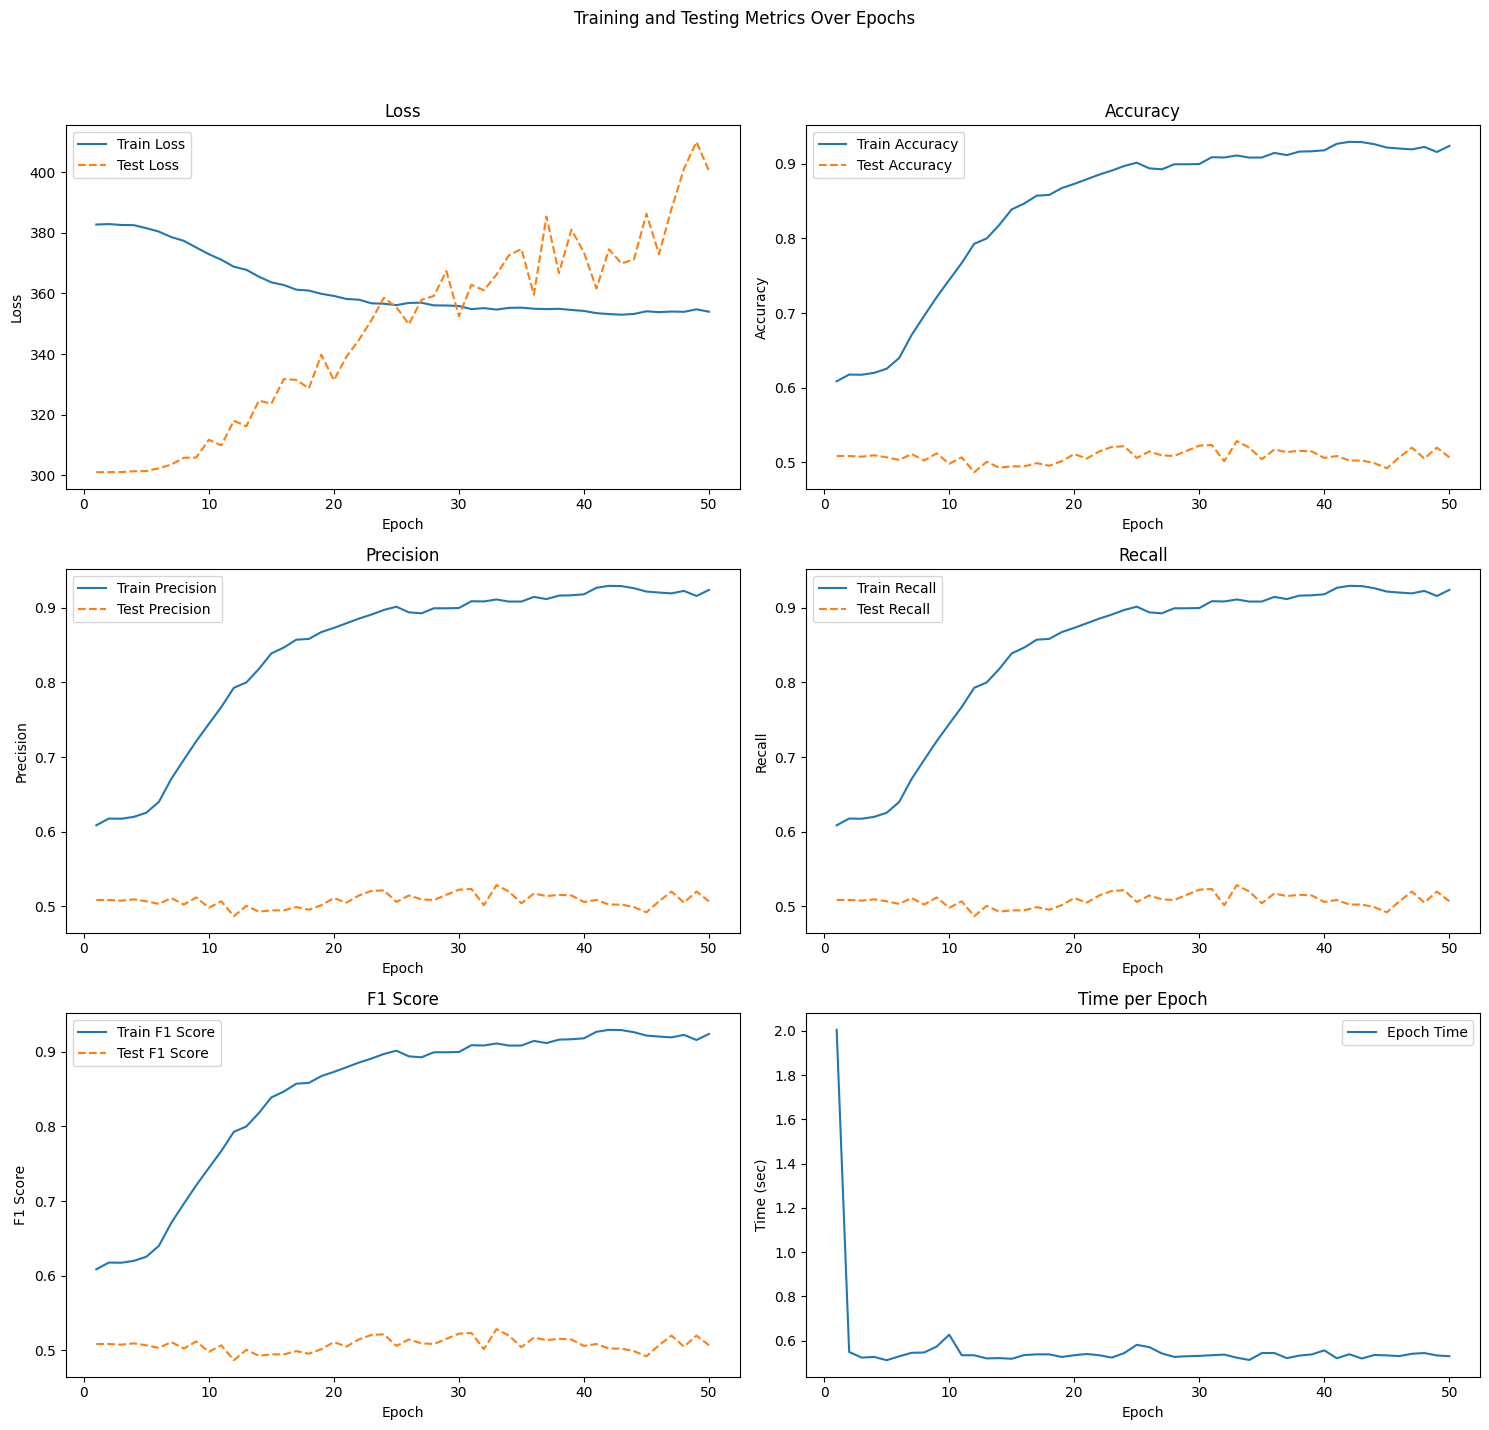

In [6]:
class CNN(nn.Module):
    def __init__(self, embedding_matrix, hidden_layer1, hidden_layer2, hidden_layer3):
        super().__init__()
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix, freeze=True)
        self.conv1 = nn.Conv1d(embedding_matrix.size(1), hidden_layer1, 3)
        self.conv2 = nn.Conv1d(hidden_layer1, hidden_layer2, 5)
        self.conv3 = nn.Conv1d(hidden_layer2, hidden_layer3, 7)
        self.fc1 = nn.Linear(208, 1) 

    def forward(self, x):
        x = self.embedding(x)
        x = x.transpose(1, 2).contiguous()
        x = F.relu(self.conv1(x))
#         x = F.max_pool1d(x, 2)
        x = F.relu(self.conv2(x))
#         x = F.max_pool1d(x, 2)
        x = F.relu(self.conv3(x))
#         x = F.max_pool1d(x, 2)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x
    
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


def train_model(model, criterion, optimizer, train_loader, test_loader, num_epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Initialize the metrics dictionary
    metrics = {
        'Epoch': [],
        'Train Loss': [],
        'Train Accuracy': [],
        'Train Precision': [],
        'Train Recall': [],
        'Train F1 Score': [],
        'Test Loss': [],
        'Test Accuracy': [],
        'Test Precision': [],
        'Test Recall': [],
        'Test F1 Score': [],
        'Epoch Time': []
    }

    for epoch in range(num_epochs):
        epoch_start = time.time()
        # Training phase
        model.train()
        total_loss = 0
        true_labels = []
        pred_labels = []

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.float()  # Ensure labels are floats for BCEWithLogitsLoss

            optimizer.zero_grad()
            outputs = model(inputs)
            outputs = outputs.view_as(labels).float()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * inputs.size(0)
            predictions = torch.sigmoid(outputs).round()  # Sigmoid and rounding to get binary predictions

            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(predictions.detach().cpu().numpy())

        train_loss = total_loss / len(train_loader.dataset)
        train_accuracy = accuracy_score(true_labels, pred_labels)
        train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='micro')
        epoch_end = time.time()

        # Evaluation phase
        model.eval()
        total_loss = 0
        true_labels = []
        pred_labels = []

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                labels = labels.float()  # Ensure labels are floats for BCEWithLogitsLoss

                outputs = model(inputs)
                outputs = outputs.view_as(labels).float()

                loss = criterion(outputs, labels)
                total_loss += loss.item() * inputs.size(0)

                predictions = torch.sigmoid(outputs).round()  # Sigmoid and rounding to get binary predictions
                true_labels.extend(labels.cpu().numpy())
                pred_labels.extend(predictions.cpu().numpy())

        test_loss = total_loss / len(test_loader.dataset)
        test_accuracy = accuracy_score(true_labels, pred_labels)
        test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='micro')

        # Record the metrics for this epoch
        metrics['Epoch'].append(epoch + 1)
        metrics['Train Loss'].append(train_loss)
        metrics['Train Accuracy'].append(train_accuracy)
        metrics['Train Precision'].append(train_precision)
        metrics['Train Recall'].append(train_recall)
        metrics['Train F1 Score'].append(train_f1)
        metrics['Test Loss'].append(test_loss)
        metrics['Test Accuracy'].append(test_accuracy)
        metrics['Test Precision'].append(test_precision)
        metrics['Test Recall'].append(test_recall)
        metrics['Test F1 Score'].append(test_f1)
        metrics['Epoch Time'].append(epoch_end - epoch_start)

    return pd.DataFrame(metrics)

# Example usage:
model =CNN(embedding_matrix_tensor, 64, 32, 16).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
metrics_df = train_model(model, criterion, optimizer, train_loader, test_loader, num_epochs=50)
plot_metrics(metrics_df)

In [7]:
metrics_df.to_csv("CNN_pos_neu.csv")

In [8]:
print("Total Training Time:", metrics_df["Epoch Time"].sum())
print("Best Test Loss:", metrics_df["Test Loss"].min())
print("Best Test Accuracy:", metrics_df["Test Accuracy"].max())
print("Best Test Precision:", metrics_df["Test Precision"].max())
print("Best Test Recall:", metrics_df["Test Recall"].max())
print("Best Test F1 Score:", metrics_df["Test F1 Score"].max())

Total Training Time: 28.342114448547363
Best Test Loss: 300.99817772952855
Best Test Accuracy: 0.5286458333333334
Best Test Precision: 0.5286458333333334
Best Test Recall: 0.5286458333333334
Best Test F1 Score: 0.5286458333333334


In [9]:
class SNNCNN_pop(nn.Module):
    def __init__(self,embedding_matrix, hidden_layer1, hidden_layer2, beta = 0.9, population_size=10):
        super().__init__()
        spike_grad = surrogate.fast_sigmoid() # fast sigmoid surrogate gradient
        self.embeding = nn.Embedding.from_pretrained(embedding_matrix, freeze=True)
        self.conv1 = nn.Conv1d(embedding_matrix_tensor.size(1), hidden_layer1, 3)
        self.lif1 = snn.Leaky(beta=beta, spike_grad=spike_grad)
        self.conv2 = nn.Conv1d(hidden_layer1, hidden_layer2, 5)
        self.lif2 = snn.Leaky(beta=beta, spike_grad=spike_grad)
        self.fc1 = nn.Linear(208, 2 * population_size)
        self.lif3 = snn.Leaky(beta=beta, spike_grad=spike_grad)

        self.conv4 = nn.Conv1d(hidden_layer2, 16, 7)
        self.lif4 = snn.Leaky(beta=beta, spike_grad=spike_grad)
        
    def forward(self, x):
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()
        mem3 = self.lif3.init_leaky()
        mem4 = self.lif4.init_leaky()

        x = self.embeding(x)
        x = x.transpose(1, 2).contiguous()

#         cur1 = F.max_pool1d(self.conv1(x), 2)
#         spk1, mem1 = self.lif1(cur1, mem1)

#         cur2 = F.max_pool1d(self.conv2(spk1), 2)
#         spk2, mem2 = self.lif2(cur2, mem2)
        cur1 = self.conv1(x)
        spk1, mem1 = self.lif1(cur1, mem1)

        cur2 = self.conv2(spk1)
        spk2, mem2 = self.lif2(cur2, mem2)
        
        cur2 = self.conv4(spk2)
        spk2, mem2 = self.lif4(cur2, mem2)
        
        cur3 = self.fc1(spk2.view(batch_size, -1))
        spk3, mem3 = self.lif3(cur3, mem3)

        return spk3, mem3

In [10]:
print(SNNCNN_pop(embedding_matrix_tensor, 64, 32, beta = 0.9, population_size=15))

SNNCNN_pop(
  (embeding): Embedding(17870, 100)
  (conv1): Conv1d(100, 64, kernel_size=(3,), stride=(1,))
  (lif1): Leaky()
  (conv2): Conv1d(64, 32, kernel_size=(5,), stride=(1,))
  (lif2): Leaky()
  (fc1): Linear(in_features=208, out_features=30, bias=True)
  (lif3): Leaky()
  (conv4): Conv1d(32, 16, kernel_size=(7,), stride=(1,))
  (lif4): Leaky()
)


Epoch 1/30, Train Loss: 7461.4176, Train Accuracy: 54.44%, Train Precision: 0.6255, Train Recall: 0.6536, Train F1 Score: 0.6393, Test Loss: 5886.2847, Test Accuracy: 51.22%, Test Precision: 0.5105, Test Recall: 0.9983, Test F1 Score: 0.6755, Epoch Time: 32.12 sec
Epoch 2/30, Train Loss: 5386.2630, Train Accuracy: 61.63%, Train Precision: 0.6180, Train Recall: 0.9921, Train F1 Score: 0.7616, Test Loss: 6081.2066, Test Accuracy: 51.13%, Test Precision: 0.5100, Test Recall: 0.9983, Test F1 Score: 0.6751, Epoch Time: 31.63 sec
Epoch 3/30, Train Loss: 5364.1764, Train Accuracy: 61.81%, Train Precision: 0.6183, Train Recall: 0.9978, Train F1 Score: 0.7635, Test Loss: 6022.5694, Test Accuracy: 50.95%, Test Precision: 0.5091, Test Recall: 1.0000, Test F1 Score: 0.6747, Epoch Time: 32.53 sec
Epoch 4/30, Train Loss: 5342.1794, Train Accuracy: 61.80%, Train Precision: 0.6179, Train Recall: 0.9991, Train F1 Score: 0.7636, Test Loss: 5906.3802, Test Accuracy: 50.95%, Test Precision: 0.5091, Test R

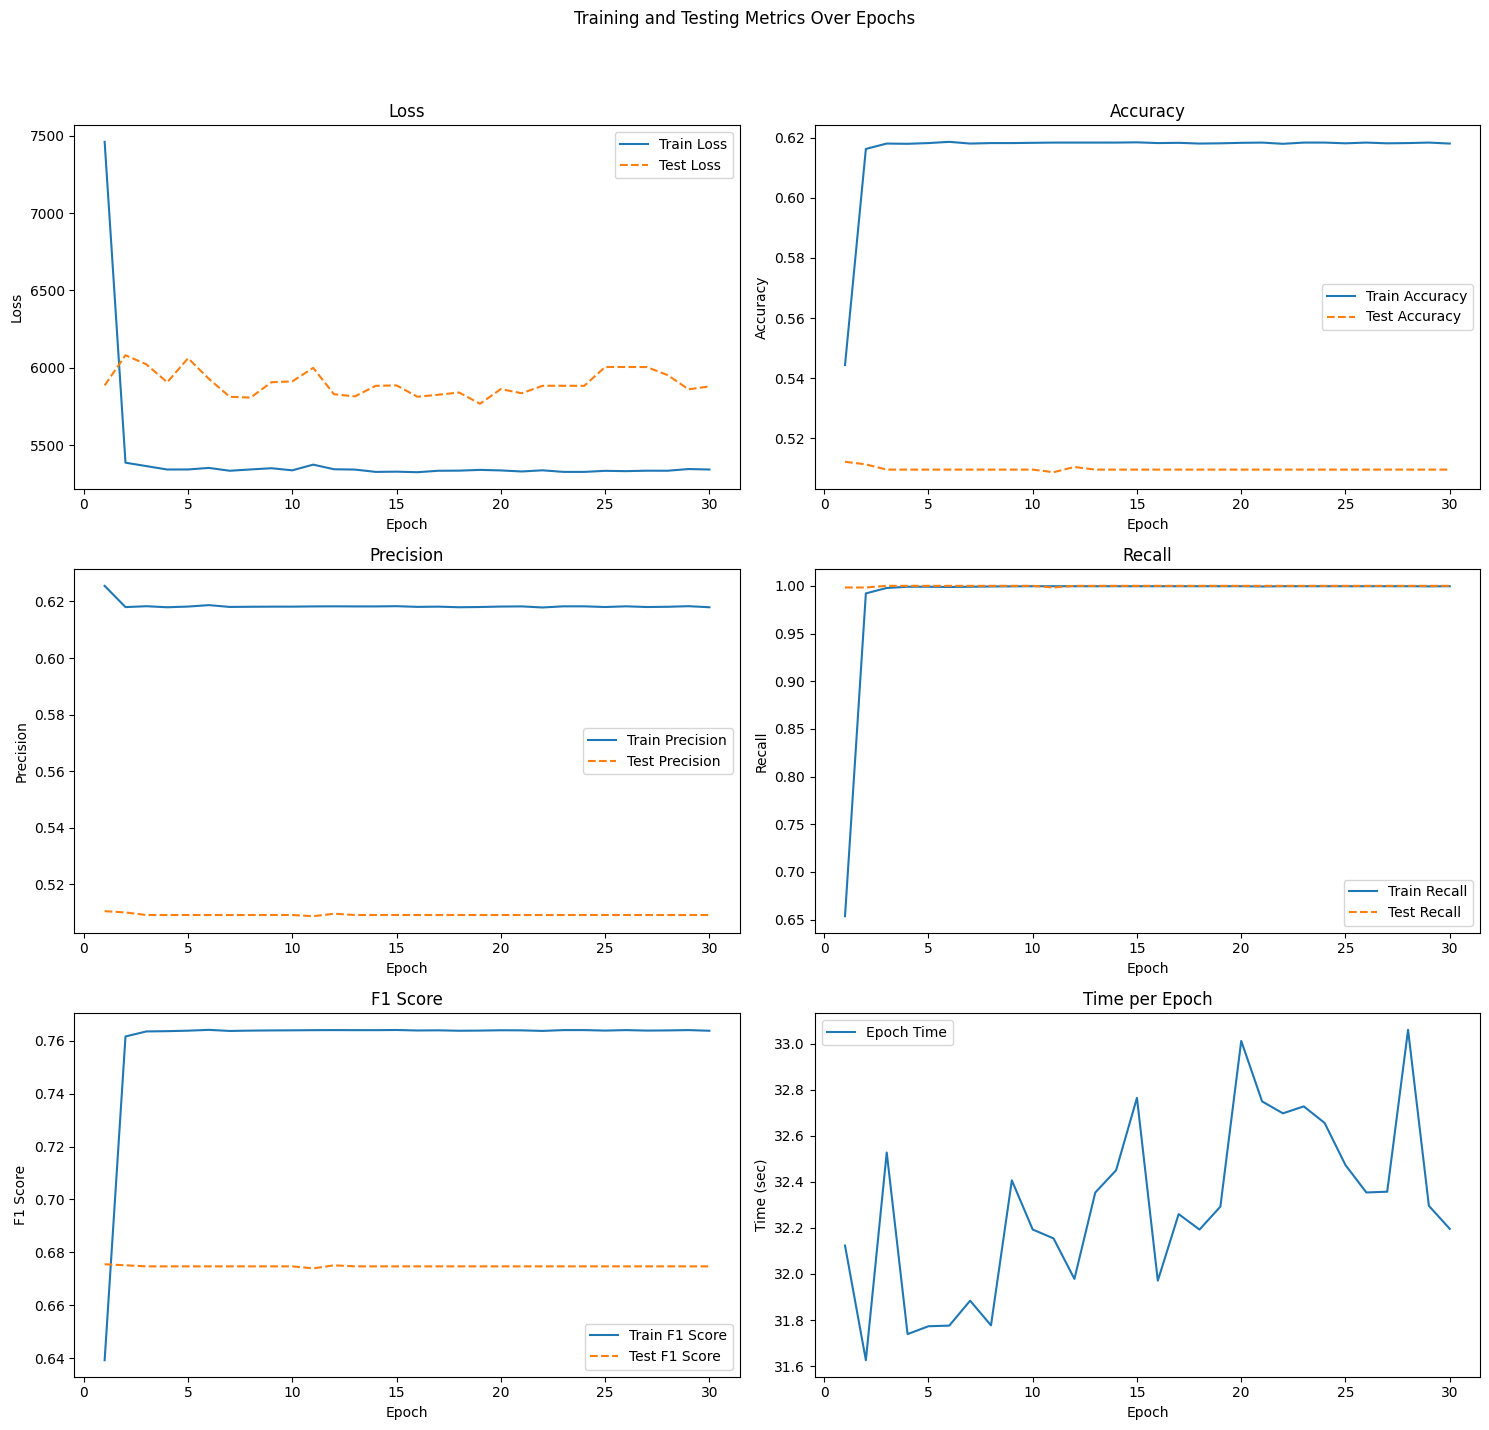

In [11]:
model = SNNCNN_pop(embedding_matrix_tensor, 64, 32, beta = 0.9, population_size=15).to(device)
criterion = SF.mse_count_loss(correct_rate=1.0, incorrect_rate=0.0, population_code=True, num_classes=2)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3, betas=(0.9, 0.999))
num_epochs = 30
num_steps = 100
metrics_df = train_test_SNN_metrics(model, criterion, optimizer, train_loader, test_loader, device, num_epochs, num_steps, population_code=True, num_classes=2, verbose=True)
plot_metrics(metrics_df)

In [12]:
metrics_df.to_csv("SNNCNN_pop_pos_neu.csv")

In [13]:
print("Total Training Time:", metrics_df["Epoch Time"].sum())
print("Best Test Loss:", metrics_df["Test Loss"].min())
print("Best Test Accuracy:", metrics_df["Test Accuracy"].max())
print("Best Test Precision:", metrics_df["Test Precision"].max())
print("Best Test Recall:", metrics_df["Test Recall"].max())
print("Best Test F1 Score:", metrics_df["Test F1 Score"].max())


Total Training Time: 968.8127548694611
Best Test Loss: 5767.361111111111
Best Test Accuracy: 0.5121527777777778
Best Test Precision: 0.5104712041884817
Best Test Recall: 1.0
Best Test F1 Score: 0.6755196304849885


In [14]:
dfTest = pd.read_csv("/kaggle/input/info-retreval/test_neu_opi.csv", encoding = 'ISO-8859-1').rename(columns={"Sentiment":"Label"})
dfTrain = pd.read_csv("/kaggle/input/info-retreval/train_neu_opi.csv", encoding = 'ISO-8859-1').rename(columns={"Sentiment":"Label"})
dfTrain["Label"]=dfTrain["Label"].map({"OPINIONATED":1, "NEUTRAL":0}).sample(frac=1).reset_index(drop=True)
dfTest["Label"]=dfTest["Label"].map({"OPINIONATED":1, "NEUTRAL":0}).sample(frac=1).reset_index(drop=True)


glove = pd.read_csv('../input/glove-global-vectors-for-word-representation/glove.6B.100d.txt', sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}

MAX_LEN = 25
train_texts = dfTrain.Headline.values.tolist() 
test_texts = dfTest.Headline.values.tolist()

X_train, X_test, tokenizer = tokenize_data(train_texts, test_texts)
embedding_matrix = create_embedding_matrix(tokenizer.word_index, embedding_dict=glove_embedding, d_model=100)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
batch_size = 128

X_train_tensor = torch.tensor(X_train, dtype=torch.long)
X_train_labels_tensor = torch.tensor(dfTrain["Label"], dtype=torch.long)
train_dataset = TensorDataset(X_train_tensor, X_train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, num_workers=3)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
X_test_labels_tensor = torch.tensor(dfTest["Label"], dtype=torch.long)
test_dataset = TensorDataset(X_test_tensor, X_test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True, num_workers=3)
embedding_matrix_tensor = torch.tensor(embedding_matrix, dtype=torch.float).to(device)

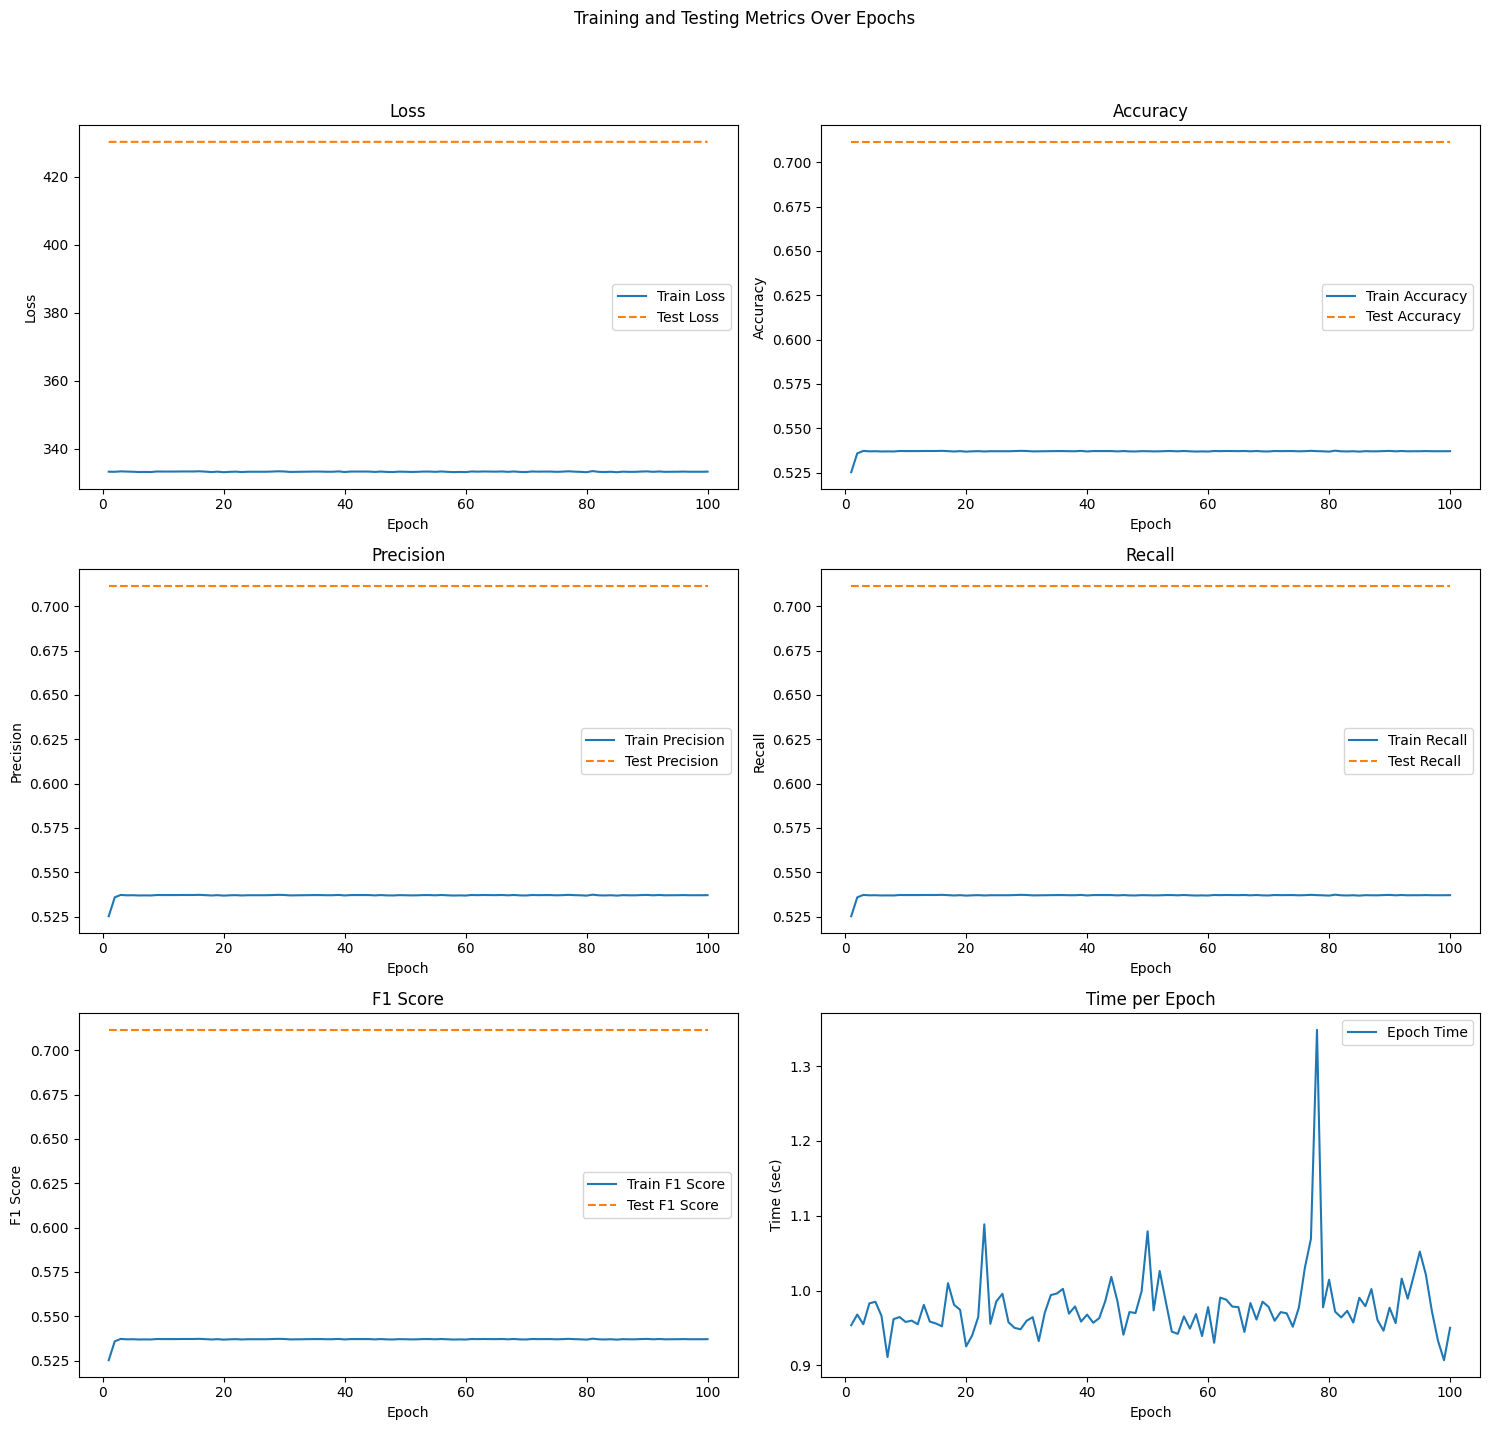

In [15]:
model = CNN(embedding_matrix_tensor, 64, 32,16).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
metrics_df = train_model(model, criterion, optimizer, train_loader, test_loader, num_epochs=100)
plot_metrics(metrics_df)

In [16]:
metrics_df.to_csv("CNN_neu_opi.csv")

In [17]:
print("Total Training Time:", metrics_df["Epoch Time"].sum())
print("Best Test Loss:", metrics_df["Test Loss"].min())
print("Best Test Accuracy:", metrics_df["Test Accuracy"].max())
print("Best Test Precision:", metrics_df["Test Precision"].max())
print("Best Test Recall:", metrics_df["Test Recall"].max())
print("Best Test F1 Score:", metrics_df["Test F1 Score"].max())

Total Training Time: 97.82208681106567
Best Test Loss: 430.2612821825629
Best Test Accuracy: 0.7115384615384616
Best Test Precision: 0.7115384615384616
Best Test Recall: 0.7115384615384616
Best Test F1 Score: 0.7115384615384616


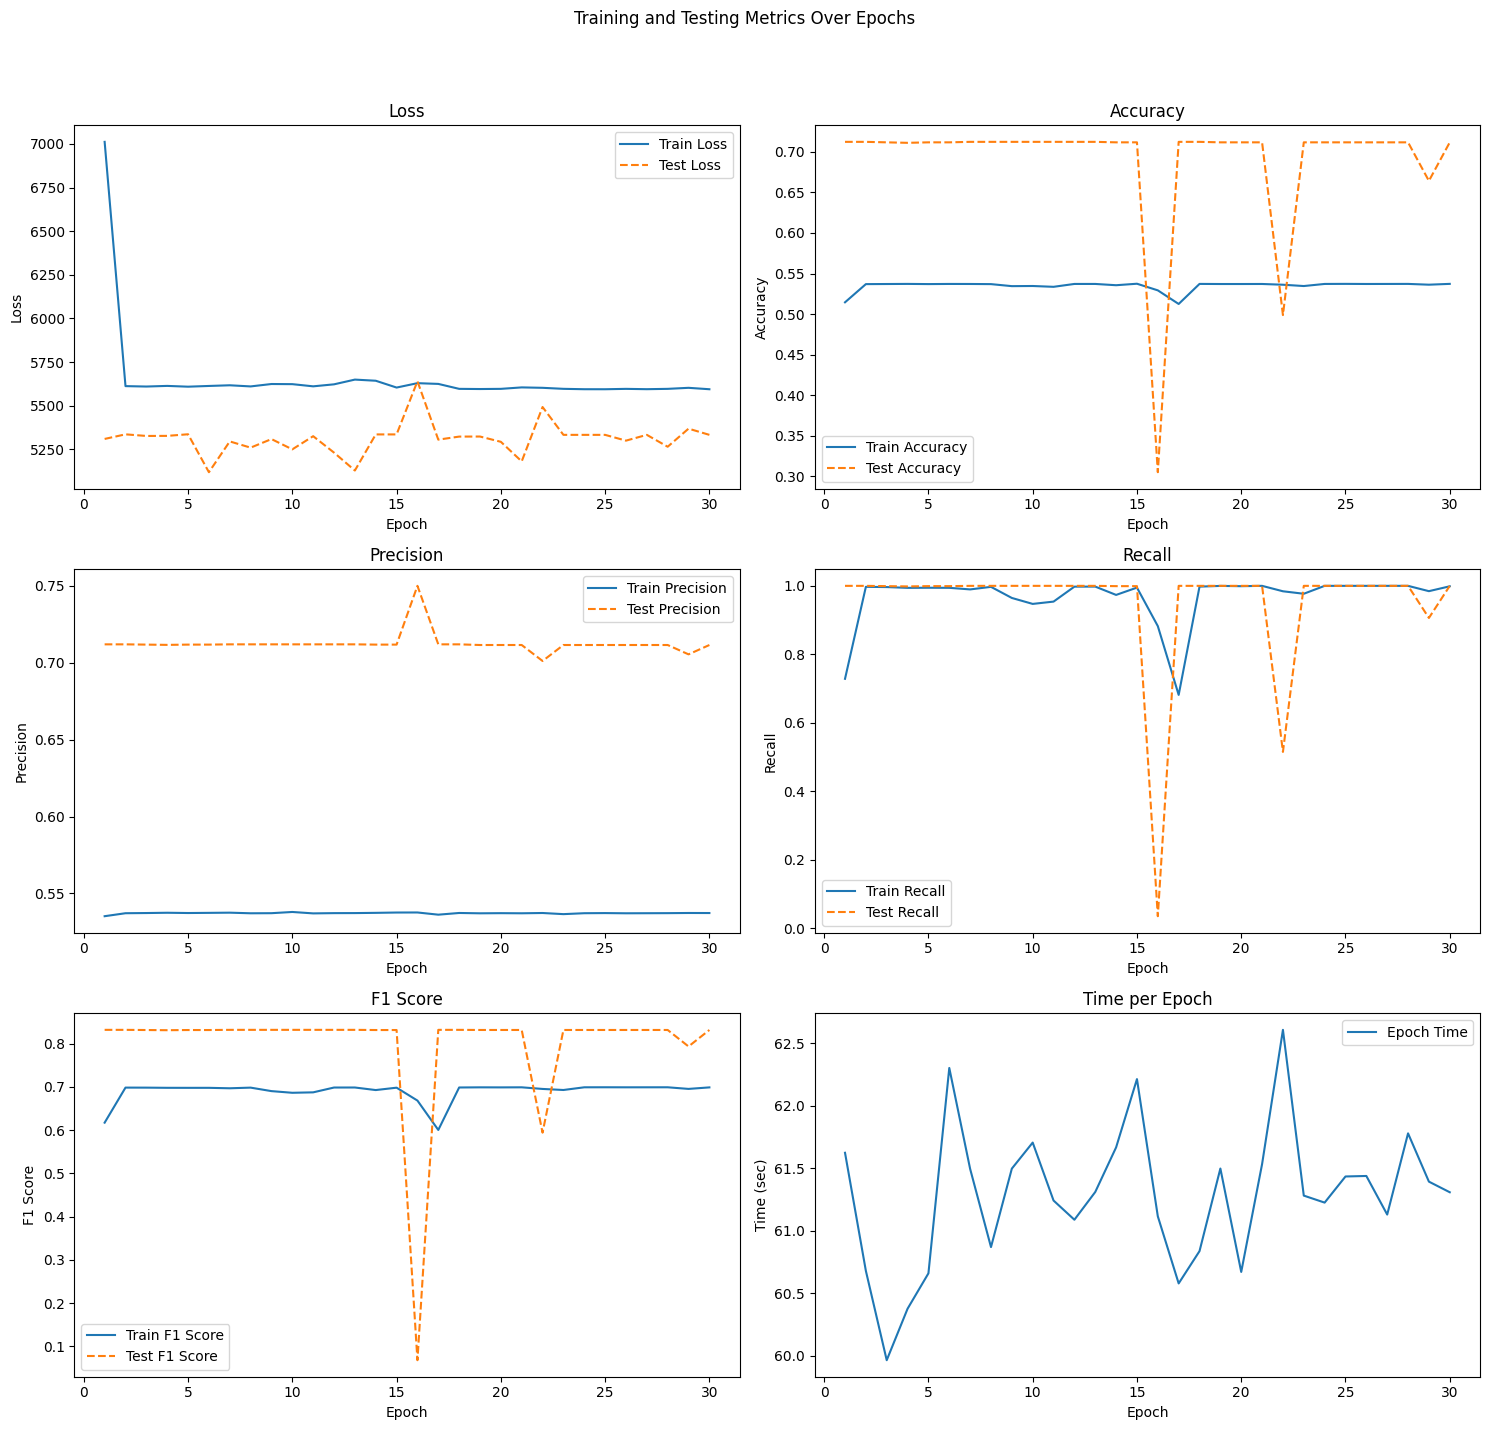

In [18]:
model = SNNCNN_pop(embedding_matrix_tensor, 64, 32, beta = 0.9, population_size=15).to(device)
criterion = SF.mse_count_loss(correct_rate=1.0, incorrect_rate=0.0, population_code=True, num_classes=2)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3, betas=(0.9, 0.999))
num_epochs = 30
num_steps = 100
metrics_df = train_test_SNN_metrics(model, criterion, optimizer, train_loader, test_loader, device, num_epochs, num_steps, population_code=True, num_classes=2, verbose=False)
plot_metrics(metrics_df)

In [19]:
metrics_df.to_csv("SNNCNN_pop_neu_opi.csv")

In [20]:
print("Total Training Time:", metrics_df["Epoch Time"].sum())
print("Best Test Loss:", metrics_df["Test Loss"].min())
print("Best Test Accuracy:", metrics_df["Test Accuracy"].max())
print("Best Test Precision:", metrics_df["Test Precision"].max())
print("Best Test Recall:", metrics_df["Test Recall"].max())
print("Best Test F1 Score:", metrics_df["Test F1 Score"].max())

Total Training Time: 1838.5320172309875
Best Test Loss: 5118.629807692308
Best Test Accuracy: 0.7121394230769231
Best Test Precision: 0.75
Best Test Recall: 1.0
Best Test F1 Score: 0.8317527221636811
